<a href="https://colab.research.google.com/github/GaetanAm/Sentiment-Analysis-and-Impact-on-Financial-Markets/blob/main/notebooks/Stage_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Necessary imports

import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import zipfile
import json
import os
from google.colab import files
from datetime import date
from lxml import etree
from io import StringIO
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from huggingface_hub import login
from transformers import pipeline
from google.colab import userdata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import KFold

# Disable unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

# FAIRE TOUTES LES ANOTATIONS + TITRES + ANALYSES COMME SUR LE STAGE 1

In [ ]:
tickers = ['TSLA', 'AAPL', 'AMZN', 'JPM', 'NFLX', 'NVDA', 'GOOG', 'NKE', 'DIS', 'BABA', 'SHOP']
start = '2010-01-01'
end = '2018-12-31'
df_ticker_return = pd.DataFrame()
for ticker in tickers:
    ticker_yf = yf.Ticker(ticker)
    if df_ticker_return.empty:
        df_ticker_return = ticker_yf.history(start = start, end = end)
        df_ticker_return['ticker']= ticker
    else:
        data_temp = ticker_yf.history(start = start, end = end)
        data_temp['ticker']= ticker
        # Use pandas.concat instead of append
        df_ticker_return = pd.concat([df_ticker_return, data_temp])
df_ticker_return.to_csv(r'return_data.csv')

In [ ]:
df_ticker_return.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,TSLA
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,TSLA
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,TSLA
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,TSLA
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,TSLA


In [ ]:
# We can preread the data
df_ticker_return = pd.read_csv('return_data.csv',
                               index_col='Date')
df_ticker_return.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,TSLA
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,TSLA
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,TSLA
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,TSLA
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,TSLA


In [ ]:
tickers = list(df_ticker_return['ticker'].unique())
print(tickers)

['TSLA', 'AAPL', 'AMZN', 'JPM', 'NFLX', 'NVDA', 'GOOG', 'NKE', 'DIS', 'BABA', 'SHOP']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('return_data.csv', index_col='Date', parse_dates=True)

# Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne :\n", df.isnull().sum())

# Imputation des valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])  # Ignorer la colonne 'ticker'


Valeurs manquantes par colonne :
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
ticker          0
dtype: int64


In [ ]:
# Standardisation avec StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Normalisation avec MinMaxScaler
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized.iloc[:, :-1] = minmax_scaler.fit_transform(df.iloc[:, :-1])


In [ ]:
# Ajouter une colonne fictive 'target' pour la démonstration
df['target'] = (df['Close'] > df['Close'].median()).astype(int)

# Utiliser SMOTE pour équilibrer les classes
smote = SMOTE()
X = df.drop(columns=['target', 'ticker'])
y = df['target']
X_resampled, y_resampled = smote.fit_resample(X, y)

# Vérifier les nouvelles proportions
print("Proportions après SMOTE :\n", y_resampled.value_counts())


Proportions après SMOTE :
 target
0    11116
1    11116
Name: count, dtype: int64


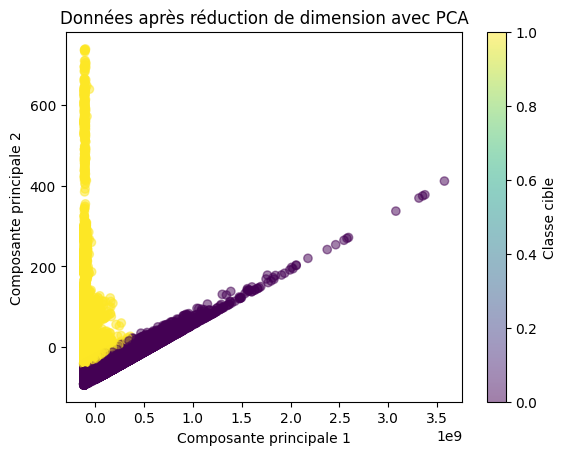

In [ ]:
# Appliquer PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Visualiser les données réduites
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled, cmap='viridis', alpha=0.5)
plt.title("Données après réduction de dimension avec PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label='Classe cible')
plt.show()


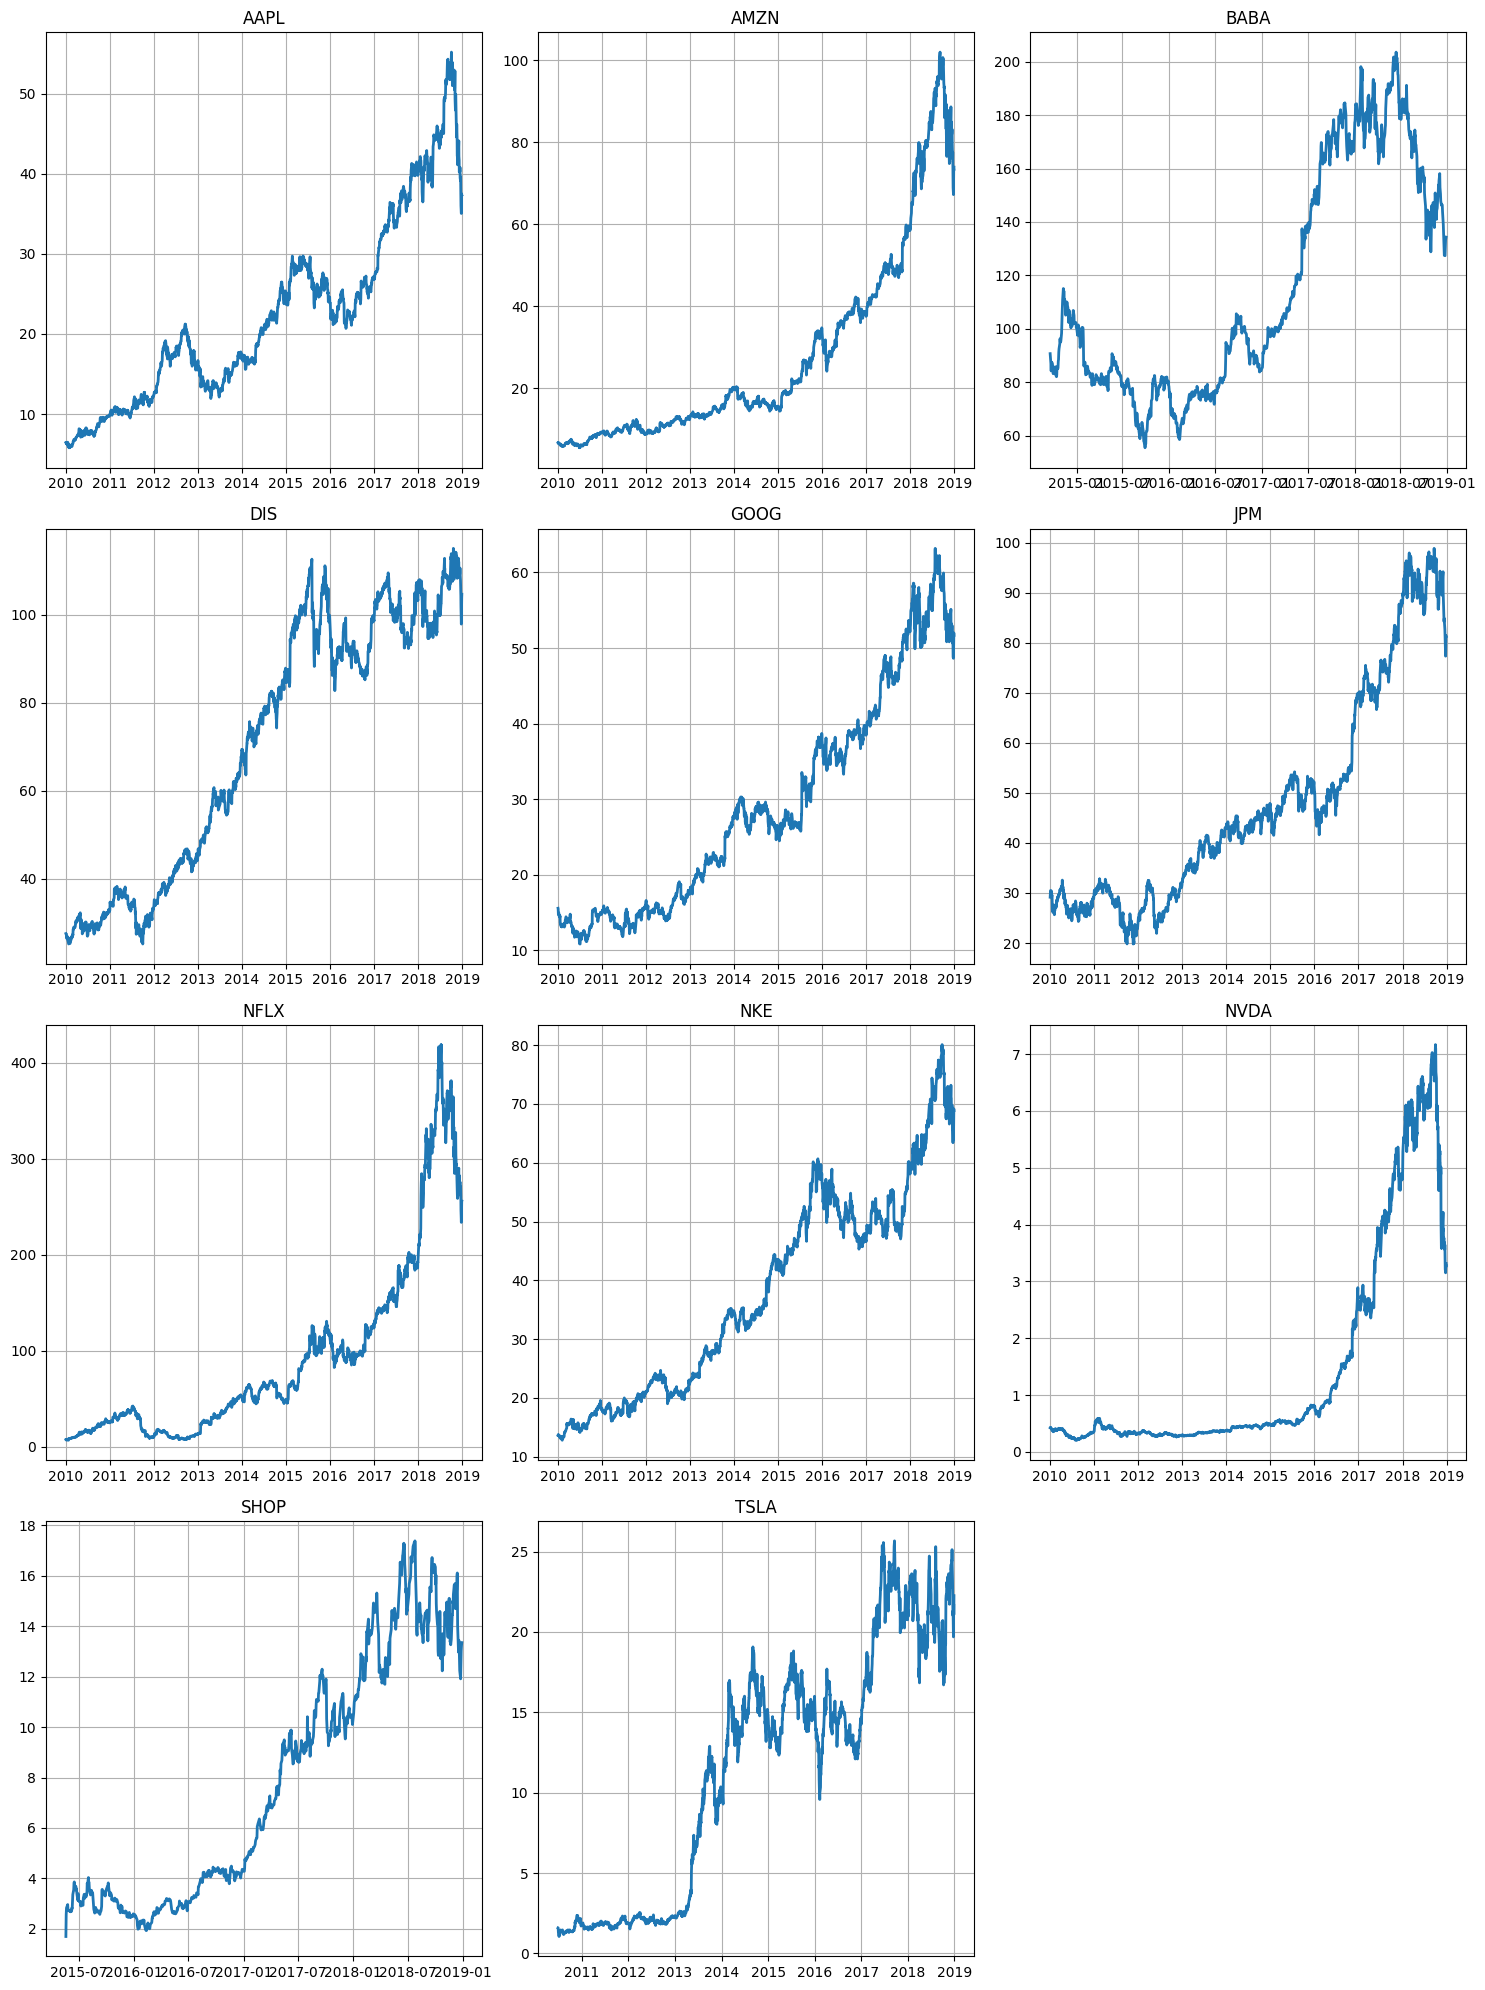

In [ ]:
import math

# Calculer le nombre de tickers
tickers = list(df['ticker'].unique())
num_tickers = len(tickers)

# Déterminer les dimensions de la grille
cols = 3  # Fixer le nombre de colonnes
rows = math.ceil(num_tickers / cols)  # Calculer dynamiquement le nombre de lignes

# Créer la grille avec le bon nombre de sous-graphiques
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Tracer les séries par ticker
for idx, (ticker, group) in enumerate(df.groupby('ticker')):
    axes[idx].plot(group['Close'], linewidth=2, label=ticker)
    axes[idx].set_title(ticker)
    axes[idx].grid(True)

# Désactiver les axes inutilisés (si les sous-graphiques dépassent le nombre de tickers)
for ax in axes[num_tickers:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Raw Headline Data.zip to Raw Headline Data.zip


In [ ]:
import zipfile
import json
import os

# Get the current working directory
current_directory = os.getcwd()

# Construct the path to the zip file relative to the current directory
zip_file_path = os.path.join(current_directory, "Raw Headline Data.zip")

# Print the path to verify it's correct
print(f"Looking for the file at: {zip_file_path}")

# Try opening the zip file
try:
    z = zipfile.ZipFile(zip_file_path, "r")
    testFile = z.namelist()[10]
    fileData = z.open(testFile).read()
    fileDataSample = json.loads(fileData)['content'][1:500]

    # json format
    print(fileDataSample)

except FileNotFoundError:
    print(f"Error: File not found at {zip_file_path}. Please ensure the file is present and the path is correct.")

Looking for the file at: /content/Raw Headline Data.zip
li class="n-box-item date-title" data-end="1305172799" data-start="1305086400" data-txt="Tuesday, December 17, 2019">Wednesday, May 11, 2011</li><li class="n-box-item sa-box-item" data-id="76179" data-ts="1305149244"><div class="media media-overflow-fix"><div class="media-left"><a class="box-ticker" href="/symbol/CSCO" target="_blank">CSCO</a></div><div class="media-body"><h4 class="media-heading"><a href="/news/76179" sasource="on_the_move_news_fidelity" target="_blank">Cisco (NASDAQ:CSCO): Pr


In [ ]:
from lxml import etree
from io import StringIO
from datetime import date
from tqdm.notebook import tqdm

# helper function performs the jsn parsing

def jsonParser(json_data):
    xml_data = json_data['content']

    tree = etree.parse(StringIO(xml_data), parser=etree.HTMLParser())

    headlines = tree.xpath("//h4[contains(@class, 'media-heading')]/a/text()")
    assert len(headlines) == json_data['count']

    main_tickers = list(map(lambda x: x.replace('/symbol/', ''), tree.xpath("//div[contains(@class, 'media-left')]//a/@href")))
    assert len(main_tickers) == json_data['count']
    final_headlines = [''.join(f.xpath('.//text()')) for f in tree.xpath("//div[contains(@class, 'media-body')]/ul/li[1]")]
    if len(final_headlines) == 0:
        final_headlines = [''.join(f.xpath('.//text()')) for f in tree.xpath("//div[contains(@class, 'media-body')]")]
        final_headlines = [f.replace(h, '').split('\xa0')[0].strip() for f,h in zip (final_headlines, headlines)]

    return main_tickers, final_headlines


data = None
data_df_news = []
ret = []
ret_f = []
with zipfile.ZipFile("/content/Raw Headline Data.zip", "r") as z:

    for filename in tqdm(z.namelist()):
#         print(filename)
        try:
            #print('Running {}'.format(filename))
            with z.open(filename) as f:
                data = f.read()
                json_data = json.loads(data)
            if json_data.get('count', 0)> 10:

                #Step 1: Parse the News Jsons
                main_tickers, final_headlines = jsonParser(json_data)

                if len(final_headlines) != json_data['count']:
                    continue

                #Step 2: Prepare Future and Event Return and assign Future and Event return for each ticker.
                file_date = filename.split('/')[-1].replace('.json', '')
                file_date = date(int(file_date[:4]), int(file_date[5:7]), int(file_date[8:]))

               #Step 3: Merge all the data in a data frame
                df_dict = {'ticker': main_tickers,
                           'headline': final_headlines,
                           'date': [file_date] * len(main_tickers)}

                df_f = pd.DataFrame(df_dict)
                data_df_news.append(df_f)

        except:
            pass

data_df_news=pd.concat(data_df_news)
display(data_df_news.head())
print(data_df_news.shape)

  0%|          | 0/3159 [00:00<?, ?it/s]

,ticker,headline,date
0,DVA,Davita (NYSE:DVA): EPS of $0.96 beats by $0.01...,2011-05-02
1,CGNX,Cognex (NASDAQ:CGNX): EPS of $0.32 beats by $0...,2011-05-02
2,AEIS,Advanced Energy Industries (NASDAQ:AEIS):,2011-05-02
3,LOCM,Local.com (NASDAQ:LOCM):,2011-05-02
4,CYDEQ,CyberDefender (CYDE):,2011-05-02


(122613, 3)


In [ ]:
# select all tickers except for empty
data_df_news = data_df_news[~(data_df_news['ticker'] == '')]
data_df_news.shape

(110711, 3)

In [ ]:
px.bar(data_df_news['ticker'].value_counts()[:100],template="plotly_white")

In [ ]:
#Computing the return
df_ticker_return['ret_curr'] = df_ticker_return['Close'].pct_change()

#Computing the event return
rtp1 = df_ticker_return['ret_curr'].shift(1) # return a day after the news
rt = df_ticker_return['ret_curr'] # return the day of the news

df_ticker_return['eventRet'] =  rt + rtp1
df_ticker_return.reset_index(level=0, inplace=True)

df_ticker_return['date'] = pd.to_datetime(df_ticker_return['Date']).apply(lambda x: x.date())

In [ ]:
# merge on date and ticker
df_all = pd.merge(data_df_news, df_ticker_return,
                  how='left',
                  left_on=['date','ticker'],
                  right_on=['date','ticker'])

df_all = df_all[df_all['ticker'].isin(tickers)]
df_all = df_all[['ticker','headline','date','eventRet','Close']]
df_all = df_all.dropna()
df_all = df_all.reset_index(drop=True)
df_all.to_csv('combined.csv',index=False)

In [ ]:
# preread combined dataframe
data_df = pd.read_csv('combined.csv')
data_df = data_df.dropna()
data_df.head()

,ticker,headline,date,eventRet,Close
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,10.059500
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,33.884285
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,10.303500
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0.418649
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,12.865873


In [ ]:
print(data_df.shape, data_df.ticker.unique().shape)

(2586, 5) (11,)


In [ ]:
data_df['sent_blob'] = data_df['headline'].apply(lambda row: TextBlob(row).sentiment.polarity)
data_df.head()

,ticker,headline,date,eventRet,Close,sent_blob
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,10.059500,0.262500
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,33.884285,-0.043750
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,10.303500,0.000000
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0.418649,0.113636
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,12.865873,0.125000


In [ ]:
login(userdata.get('LOGIN_HF'))
# Charger FinBERT
sentiment_pipeline = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone")
def analyze_sentiment(text):
    try:
        return sentiment_pipeline(inputs=text)[0]['label']  # Utiliser "inputs" si "text" ne fonctionne pas
    except Exception as e:
        print(f"Erreur avec le texte : {text} -> {e}")
        return "Error"
# Appliquer l'analyse des sentiments à tous les titres
data_df['sent_finbert'] = data_df['headline'].apply(analyze_sentiment)

# Afficher un aperçu des résultats
print(data_df[['headline', 'sent_finbert']].head())

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

Device set to use cpu


KeyboardInterrupt: 

In [ ]:
data_df.head()

In [ ]:
def map_finbert_sentiment(label):
    if label == "Positive":
        return 1
    elif label == "Negative":
        return -1
    else:
        return 0

data_df['sent_finbert_score'] = data_df['sent_finbert'].apply(map_finbert_sentiment)

In [ ]:
data_df.head()

In [ ]:
# Suppression de la colonne 'sent_finbert'
data_df = data_df.drop(columns=['sent_finbert'])

# Sauvegarder le DataFrame en CSV
csv_path = "sentiment_data.csv"
data_df.to_csv(csv_path, index=False)

# Télécharger le fichier CSV

# files.download(csv_path)

# MACHINE LEARNING

## Initialisation

In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/GaetanAm/Sentiment-Analysis-and-Impact-on-Financial-Markets/refs/heads/main/data/sentiment_data.csv"

data_df = pd.read_csv(url)

# Aperçu des données
print(data_df.head())


  ticker                                           headline        date  \
0   AMZN  Whole Foods (WFMI) -5.2% following a downgrade...  2011-05-02   
1   NFLX  Netflix (NFLX +1.1%) shares post early gains a...  2011-05-02   
2   AMZN  Amazon.com (AMZN -1.7%) shares slip as comment...  2011-05-12   
3   NVDA  Nvidia (NVDA -8.2%) shares slump after Needham...  2011-05-13   
4   GOOG  It's been some time coming, but Google (GOOG -...  2011-05-16   

   eventRet      Close  sent_blob  sent_finbert_score  
0  0.031269  10.059500   0.262500                   0  
1  0.012173  33.884285  -0.043750                   1  
2  0.010426  10.303500   0.000000                  -1  
3 -0.077562   0.418649   0.113636                  -1  
4 -0.031297  12.865873   0.125000                   0  


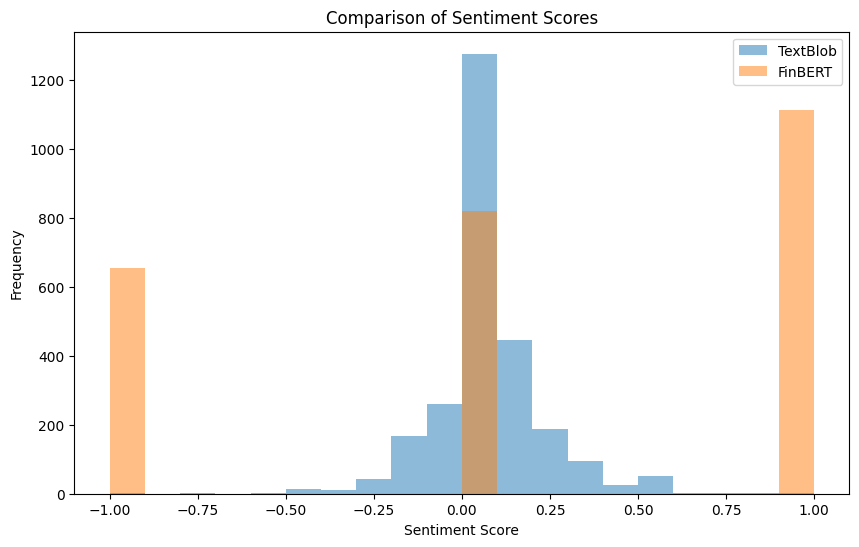

In [5]:
# Compare the distributions
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.hist(data_df['sent_blob'], bins=20, alpha=0.5, label='TextBlob')  # Plot TextBlob sentiment scores
plt.hist(data_df['sent_finbert_score'], bins=20, alpha=0.5, label='FinBERT')  # Plot FinBERT sentiment scores
plt.legend()
plt.title("Comparison of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()



TextBlob:

The scores are concentrated around 0, suggesting that TextBlob often assigns neutral sentiments. This behavior is expected, as TextBlob is not specifically trained for financial contexts.

FinBERT:

The scores are more polarized, with a significant number of values near -1 and 1. This indicates that FinBERT is better at detecting strong positive or negative sentiments, likely due to its training on financial datasets.

Conclusion

This visualization highlights the suitability of FinBERT for financial sentiment analysis, as it provides more decisive sentiment classifications compared to the generalized behavior of TextBlob.

In [6]:
#  we calculate the correlation between three variables
print(data_df[['eventRet', 'sent_blob', 'sent_finbert_score']].corr())

                    eventRet  sent_blob  sent_finbert_score
eventRet            1.000000   0.075331            0.294376
sent_blob           0.075331   1.000000            0.203759
sent_finbert_score  0.294376   0.203759            1.000000


Results

eventRet and sent_blob:

Correlation: 0.075 (low positive correlation).
TextBlob has a weak relationship with event returns, indicating limited predictive power for financial sentiment analysis.

eventRet and sent_finbert_score:

Correlation: 0.294 (moderate positive correlation).
FinBERT shows a stronger relationship with event returns, making it a better tool for analyzing financial sentiment.

sent_blob and sent_finbert_score:

Correlation: 0.204 (low positive correlation).
The two sentiment analysis tools have different methodologies and training data, which explains the low correlation between their scores.

Conclusion

FinBERT is more aligned with financial outcomes (eventRet) than TextBlob, confirming its suitability for financial sentiment analysis.
The correlation values indicate that while sentiment scores are useful, additional features or more complex models may be needed to better predict financial returns.

## POUR LE STAGE 3 ON RAJOUTE LA CROSS VALIDATION SUR TOUT LES ALGO DONC NOUVELLES CONCLUSION A FAIRE

## Linear regression

In [ ]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['eventRet']  # Target variable for regression

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

TextBlob: Very low R² (0.003), indicating almost no explanatory power.

FinBERT: Slightly better R² (0.041), but still low.

Combined: Combining TextBlob and FinBERT scores marginally improves R² (0.0419).

These results suggest that neither TextBlob nor FinBERT alone is sufficient to explain event returns, and their combined effect is minimal.

--- TextBlob ---
Mean MSE: 0.0035 ± 0.0016
Mean R²: -0.0096 ± 0.0191

--- FinBERT ---
Mean MSE: 0.0032 ± 0.0015
Mean R²: 0.0806 ± 0.0327

--- Combined (TextBlob + FinBERT) ---
Mean MSE: 0.0032 ± 0.0015
Mean R²: 0.0807 ± 0.0328



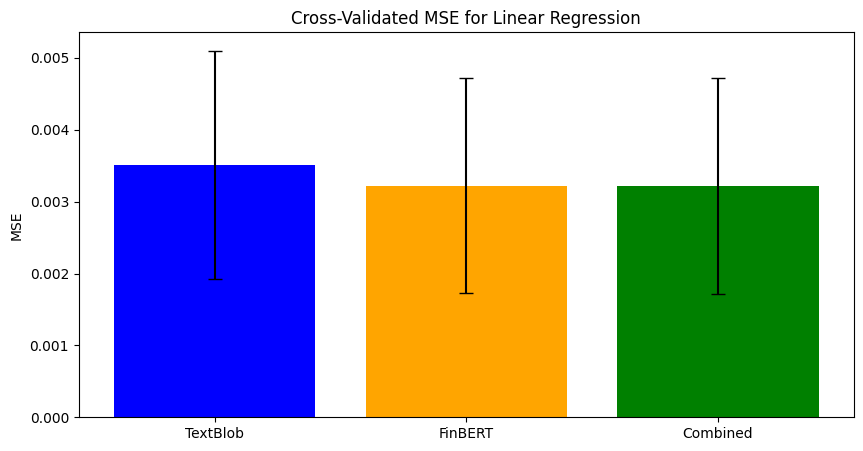

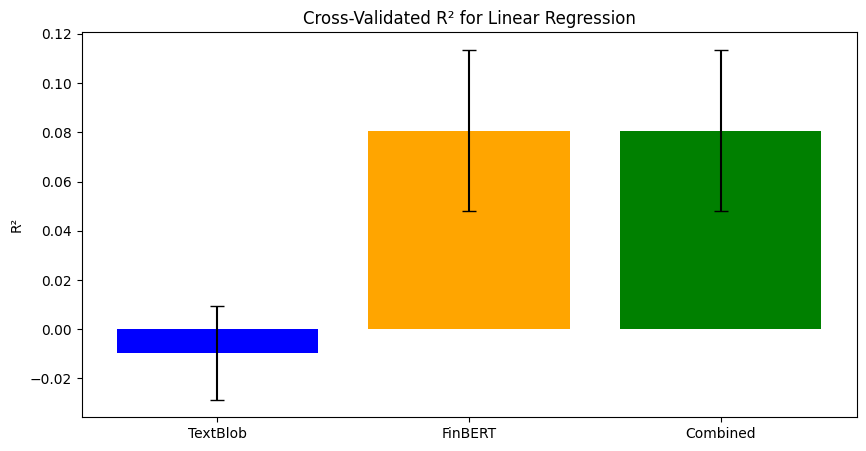

In [ ]:
# Function for k-fold cross-validation with linear regression
def cross_validate_linear_regression(X, y, label, cv=5):
    lin_reg = LinearRegression()

    # Calculate cross-validated MSE (negative because sklearn minimizes)
    mse_scores = -cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=cv)
    # Calculate cross-validated R²
    r2_scores = cross_val_score(lin_reg, X, y, scoring='r2', cv=cv)

    print(f"--- {label} ---")
    print(f"Mean MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
    print(f"Mean R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}\n")

    return mse_scores, r2_scores

# Perform cross-validation for TextBlob
mse_blob_cv, r2_blob_cv = cross_validate_linear_regression(X_blob, y, "TextBlob")

# Perform cross-validation for FinBERT
mse_finbert_cv, r2_finbert_cv = cross_validate_linear_regression(X_finbert, y, "FinBERT")

# Perform cross-validation for Combined data
mse_combined_cv, r2_combined_cv = cross_validate_linear_regression(X_combined, y, "Combined (TextBlob + FinBERT)")

# Compile results for visualization
labels = ['TextBlob', 'FinBERT', 'Combined']
mse_means = [np.mean(mse_blob_cv), np.mean(mse_finbert_cv), np.mean(mse_combined_cv)]
mse_stds = [np.std(mse_blob_cv), np.std(mse_finbert_cv), np.std(mse_combined_cv)]
r2_means = [np.mean(r2_blob_cv), np.mean(r2_finbert_cv), np.mean(r2_combined_cv)]
r2_stds = [np.std(r2_blob_cv), np.std(r2_finbert_cv), np.std(r2_combined_cv)]

# Visualize MSE
plt.figure(figsize=(10, 5))
plt.bar(labels, mse_means, yerr=mse_stds, color=['blue', 'orange', 'green'], capsize=5)
plt.title("Cross-Validated MSE for Linear Regression")
plt.ylabel("MSE")
plt.show()

# Visualize R²
plt.figure(figsize=(10, 5))
plt.bar(labels, r2_means, yerr=r2_stds, color=['blue', 'orange', 'green'], capsize=5)
plt.title("Cross-Validated R² for Linear Regression")
plt.ylabel("R²")
plt.show()


MSE Comparison:

All models exhibit low MSE, but the differences between them are minimal.

R² Comparison:

TextBlob shows an almost negligible R², indicating it contributes little to explaining the target variable.

FinBERT has a higher R², but it is still limited.

Combining TextBlob and FinBERT scores slightly improves R², but the gain is marginal.

These visualizations confirm that sentiment scores alone (even when combined) have limited predictive power for event returns in this linear regression setting.

## Logistic regression

FinBERT alone provides better predictive performance for positive returns compared to TextBlob.

Combining both features does not yield additional benefits, suggesting that FinBERT captures most of the relevant information.



This analysis confirms that FinBERT is a better choice for financial sentiment classification tasks, while TextBlob adds little value in this context.

In [ ]:
# Ensure the target variable is binary
data_df['target_binary'] = (data_df['eventRet'] > 0).astype(int)
y = data_df['target_binary']
# Function for k-fold cross-validation with logistic regression
def cross_validate_logistic_regression(X, y, label, cv=5):
    log_reg = LogisticRegression(max_iter=1000)

    # Define scoring metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',  # Ensure ROC-AUC is included
    }

    # Perform cross-validation
    scores = cross_validate(log_reg, X, y, scoring=scoring, cv=cv, return_train_score=False)

    print(f"--- {label} ---")
    for metric, values in scores.items():
        if 'test' in metric:
            print(f"{metric.replace('test_', '').capitalize()}: {np.mean(values):.4f} ± {np.std(values):.4f}")
    print("\n")

    return scores

# Apply cross-validation
print("Logistic Regression:")
scores_blob = cross_validate_logistic_regression(X_blob, y, "Logistic Regression - TextBlob")
scores_finbert = cross_validate_logistic_regression(X_finbert, y, "Logistic Regression - FinBERT")
scores_combined = cross_validate_logistic_regression(X_combined, y, "Logistic Regression - Combined")


Logistic Regression:
--- Logistic Regression - TextBlob ---
Accuracy: 0.5534 ± 0.0095
Precision: 0.5499 ± 0.0058
Recall: 0.9469 ± 0.0237
F1: 0.6956 ± 0.0070
Roc_auc: 0.5419 ± 0.0274


--- Logistic Regression - FinBERT ---
Accuracy: 0.6400 ± 0.0183
Precision: 0.6207 ± 0.0181
Recall: 0.8594 ± 0.0355
F1: 0.7201 ± 0.0111
Roc_auc: 0.6546 ± 0.0189


--- Logistic Regression - Combined ---
Accuracy: 0.6319 ± 0.0199
Precision: 0.6190 ± 0.0198
Recall: 0.8307 ± 0.0347
F1: 0.7087 ± 0.0117
Roc_auc: 0.6523 ± 0.0254




In [ ]:
# Extract mean scores for visualization
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {
    'TextBlob': [np.mean(scores_blob[f'test_{metric}']) for metric in metrics],
    'FinBERT': [np.mean(scores_finbert[f'test_{metric}']) for metric in metrics],
    'Combined': [np.mean(scores_combined[f'test_{metric}']) for metric in metrics],
}

# Convert to DataFrame for easy visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'])
print(results_df)

           TextBlob   FinBERT  Combined
Accuracy   0.553362  0.639980  0.631857
Precision  0.549865  0.620744  0.619037
Recall     0.946941  0.859426  0.830716
F1-score   0.695594  0.720121  0.708660
ROC-AUC    0.541860  0.654553  0.652275


In [ ]:
# Function for logistic regression with class weighting
def cross_validate_logistic_regression_weighted(X, y, label, cv=5):
    log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

    # Define scoring metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',  # Ensure ROC-AUC is included
    }

    # Perform cross-validation
    scores = cross_validate(log_reg, X, y, scoring=scoring, cv=cv, return_train_score=False)

    print(f"--- {label} (with Class Weighting) ---")
    for metric, values in scores.items():
        if 'test' in metric:
            print(f"{metric.replace('test_', '').capitalize()}: {np.mean(values):.4f} ± {np.std(values):.4f}")
    print("\n")

    return scores

# Apply weighted logistic regression
print("Logistic Regression with Class Weighting:")
scores_blob_weighted = cross_validate_logistic_regression_weighted(X_blob, y, "TextBlob")
scores_finbert_weighted = cross_validate_logistic_regression_weighted(X_finbert, y, "FinBERT")
scores_combined_weighted = cross_validate_logistic_regression_weighted(X_combined, y, "Combined")


Logistic Regression with Class Weighting:
--- TextBlob (with Class Weighting) ---
Accuracy: 0.5132 ± 0.0066
Precision: 0.5676 ± 0.0188
Recall: 0.4239 ± 0.0593
F1: 0.4819 ± 0.0313
Roc_auc: 0.5419 ± 0.0274


--- FinBERT (with Class Weighting) ---
Accuracy: 0.6106 ± 0.0265
Precision: 0.6744 ± 0.0155
Recall: 0.5379 ± 0.0965
F1: 0.5933 ± 0.0628
Roc_auc: 0.6546 ± 0.0189


--- Combined (with Class Weighting) ---
Accuracy: 0.6114 ± 0.0267
Precision: 0.6738 ± 0.0153
Recall: 0.5422 ± 0.0990
F1: 0.5954 ± 0.0640
Roc_auc: 0.6523 ± 0.0254




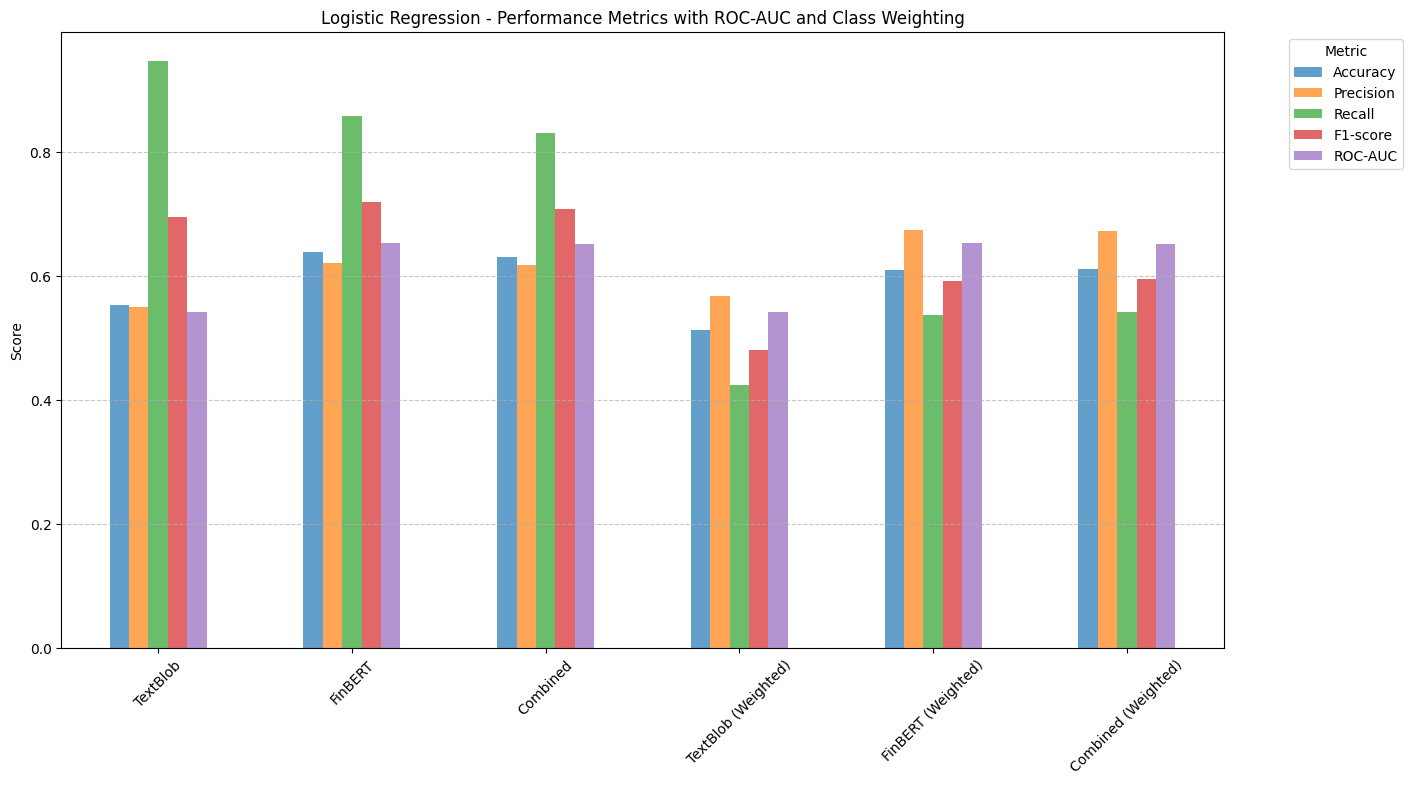

In [ ]:
# Compile mean scores for visualization
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {
    'TextBlob': [np.mean(scores_blob[f'test_{metric}']) for metric in metrics],
    'FinBERT': [np.mean(scores_finbert[f'test_{metric}']) for metric in metrics],
    'Combined': [np.mean(scores_combined[f'test_{metric}']) for metric in metrics],
    'TextBlob (Weighted)': [np.mean(scores_blob_weighted[f'test_{metric}']) for metric in metrics],
    'FinBERT (Weighted)': [np.mean(scores_finbert_weighted[f'test_{metric}']) for metric in metrics],
    'Combined (Weighted)': [np.mean(scores_combined_weighted[f'test_{metric}']) for metric in metrics],
}

# Convert to DataFrame for visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'])

# Display as a grouped bar chart
results_df.T.plot(kind='bar', figsize=(15, 8), alpha=0.7, capsize=5)
plt.title("Logistic Regression - Performance Metrics with ROC-AUC and Class Weighting")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Decision Tree Regression

In [ ]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['eventRet']  # Target variable for regression

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

--- Decision Tree Regression - TextBlob ---
Mean MSE: 0.2496 ± 0.0023
Mean R²: -0.0062 ± 0.0120

--- Decision Tree Regression - FinBERT ---
Mean MSE: 0.2266 ± 0.0065
Mean R²: 0.0866 ± 0.0227

--- Decision Tree Regression - Combined ---
Mean MSE: 0.2285 ± 0.0071
Mean R²: 0.0790 ± 0.0246



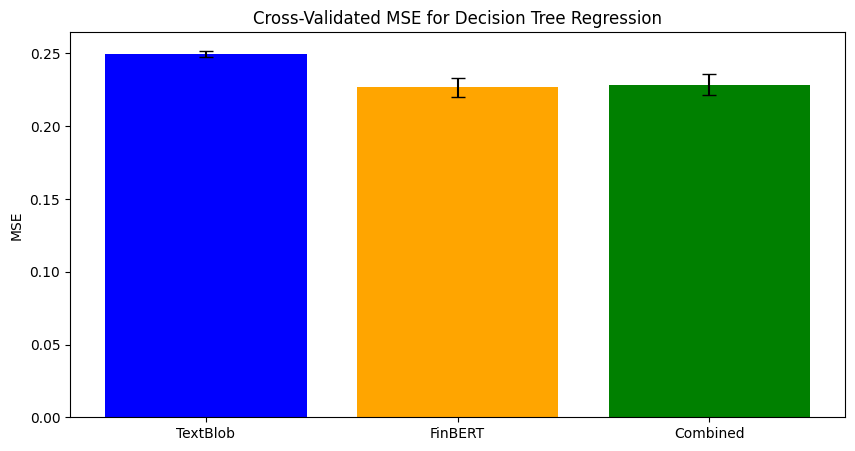

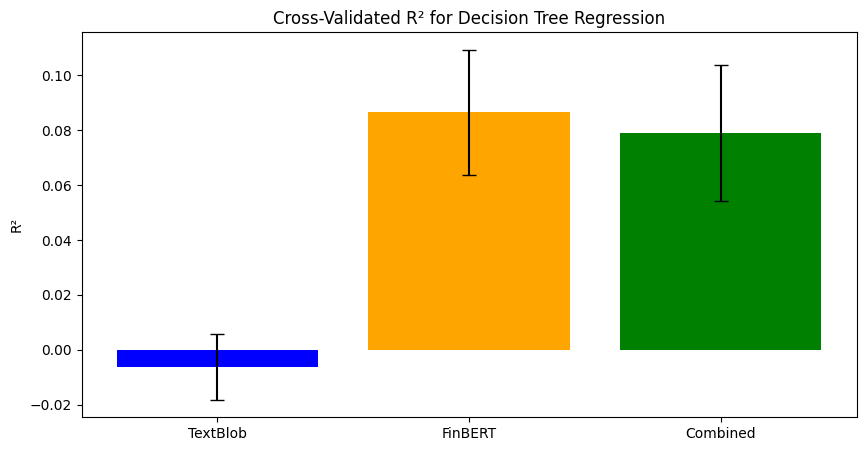

In [ ]:
# Function for k-fold cross-validation with Decision Tree Regression
def cross_validate_decision_tree(X, y, label, max_depth=3, cv=5):
    tree_reg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    # Calculate cross-validated MSE (negative because sklearn minimizes)
    mse_scores = -cross_val_score(tree_reg, X, y, scoring='neg_mean_squared_error', cv=cv)
    # Calculate cross-validated R²
    r2_scores = cross_val_score(tree_reg, X, y, scoring='r2', cv=cv)

    print(f"--- {label} ---")
    print(f"Mean MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
    print(f"Mean R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}\n")

    return mse_scores, r2_scores

# Perform cross-validation for TextBlob
mse_blob_cv, r2_blob_cv = cross_validate_decision_tree(X_blob, y, "Decision Tree Regression - TextBlob")

# Perform cross-validation for FinBERT
mse_finbert_cv, r2_finbert_cv = cross_validate_decision_tree(X_finbert, y, "Decision Tree Regression - FinBERT")

# Perform cross-validation for Combined Data
mse_combined_cv, r2_combined_cv = cross_validate_decision_tree(X_combined, y, "Decision Tree Regression - Combined")

# Compile results for visualization
labels = ['TextBlob', 'FinBERT', 'Combined']
mse_means = [np.mean(mse_blob_cv), np.mean(mse_finbert_cv), np.mean(mse_combined_cv)]
mse_stds = [np.std(mse_blob_cv), np.std(mse_finbert_cv), np.std(mse_combined_cv)]
r2_means = [np.mean(r2_blob_cv), np.mean(r2_finbert_cv), np.mean(r2_combined_cv)]
r2_stds = [np.std(r2_blob_cv), np.std(r2_finbert_cv), np.std(r2_combined_cv)]

# Visualize MSE
plt.figure(figsize=(10, 5))
plt.bar(labels, mse_means, yerr=mse_stds, color=['blue', 'orange', 'green'], capsize=5)
plt.title("Cross-Validated MSE for Decision Tree Regression")
plt.ylabel("MSE")
plt.show()

# Visualize R²
plt.figure(figsize=(10, 5))
plt.bar(labels, r2_means, yerr=r2_stds, color=['blue', 'orange', 'green'], capsize=5)
plt.title("Cross-Validated R² for Decision Tree Regression")
plt.ylabel("R²")
plt.show()


FinBERT outperforms TextBlob, aligning more closely with financial outcomes.
Combining TextBlob and FinBERT does not improve performance, likely because TextBlob does not provide additional meaningful information.

Decision Tree Regression confirms that FinBERT is more effective for predicting financial event returns. However, the overall predictive power remains limited, indicating that additional features or advanced models may be required.

The tree attempts to minimize the squared error by dividing sent_blob into different ranges.
However, most splits result in small variations, indicating that TextBlob scores have limited predictive power for financial returns.

The first split occurs at sent_finbert_score <= -0.5, which separates strongly negative sentiments.
Further splits refine the predictions based on score ranges.
FinBERT captures meaningful patterns, with some nodes showing reduced squared error, demonstrating its stronger relationship with financial outcomes compared to TextBlob.

The decision tree for combined features shows that FinBERT remains the dominant predictor of financial returns.
While TextBlob adds some variability to the model, its contribution is less impactful.
This visualization reinforces earlier findings that combining TextBlob and FinBERT does not significantly improve the predictive power over FinBERT alone.

## Random Forest regression

In [ ]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['eventRet']  # Target variable for regression

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

--- Random Forest Regression - TextBlob ---
Mean MSE: 0.2540 ± 0.0032
Mean R²: -0.0239 ± 0.0120

--- Random Forest Regression - FinBERT ---
Mean MSE: 0.2266 ± 0.0066
Mean R²: 0.0867 ± 0.0229

--- Random Forest Regression - Combined ---
Mean MSE: 0.2387 ± 0.0089
Mean R²: 0.0379 ± 0.0317



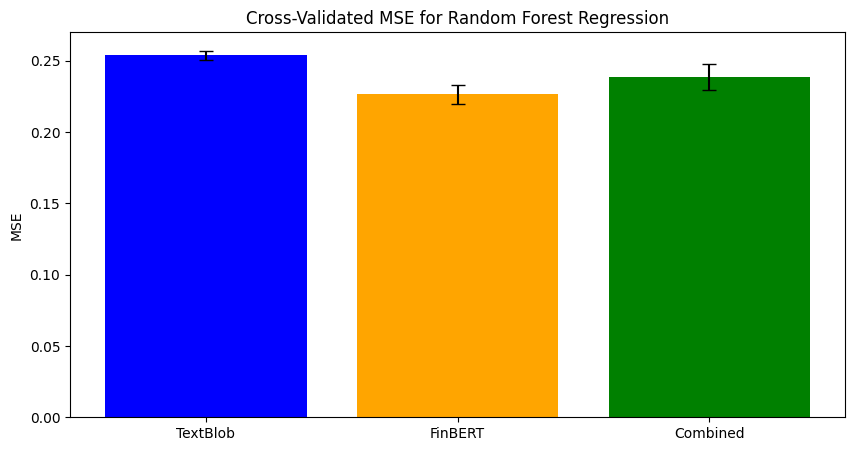

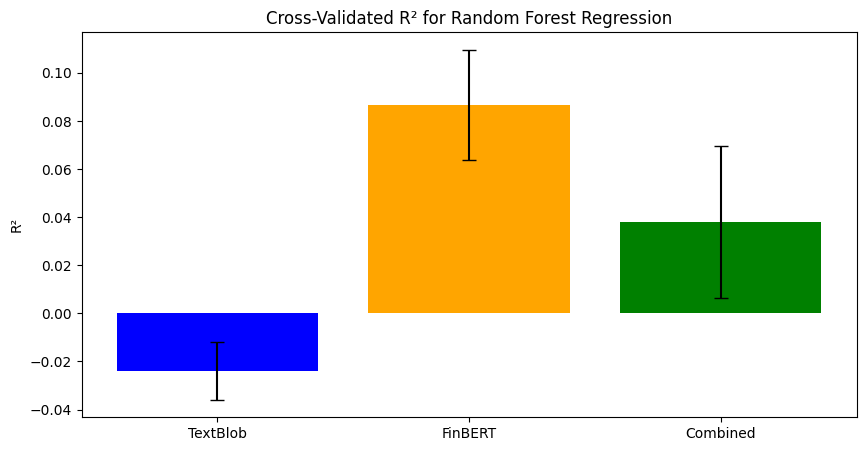

In [ ]:
# Function to perform k-fold cross-validation for Random Forest regression
def cross_validate_random_forest(X, y, label, cv=5):
    rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

    # Calculate cross-validated MSE (negative because sklearn minimizes)
    mse_scores = -cross_val_score(rf_reg, X, y, scoring='neg_mean_squared_error', cv=cv)
    # Calculate cross-validated R²
    r2_scores = cross_val_score(rf_reg, X, y, scoring='r2', cv=cv)

    print(f"--- {label} ---")
    print(f"Mean MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
    print(f"Mean R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}\n")

    return mse_scores, r2_scores

# Cross-Validation on TextBlob
mse_blob_cv, r2_blob_cv = cross_validate_random_forest(X_blob, y, "Random Forest Regression - TextBlob")

# Cross-Validation on FinBERT
mse_finbert_cv, r2_finbert_cv = cross_validate_random_forest(X_finbert, y, "Random Forest Regression - FinBERT")

# Cross-Validation on Combined Data
mse_combined_cv, r2_combined_cv = cross_validate_random_forest(X_combined, y, "Random Forest Regression - Combined")

# Compile results for visualization
labels = ['TextBlob', 'FinBERT', 'Combined']
mse_means = [np.mean(mse_blob_cv), np.mean(mse_finbert_cv), np.mean(mse_combined_cv)]
mse_stds = [np.std(mse_blob_cv), np.std(mse_finbert_cv), np.std(mse_combined_cv)]
r2_means = [np.mean(r2_blob_cv), np.mean(r2_finbert_cv), np.mean(r2_combined_cv)]
r2_stds = [np.std(r2_blob_cv), np.std(r2_finbert_cv), np.std(r2_combined_cv)]

# Visualize MSE
plt.figure(figsize=(10, 5))
plt.bar(labels, mse_means, yerr=mse_stds, color=['blue', 'orange', 'green'], capsize=5)
plt.title("Cross-Validated MSE for Random Forest Regression")
plt.ylabel("MSE")
plt.show()

# Visualize R²
plt.figure(figsize=(10, 5))
plt.bar(labels, r2_means, yerr=r2_stds, color=['blue', 'orange', 'green'], capsize=5)
plt.title("Cross-Validated R² for Random Forest Regression")
plt.ylabel("R²")
plt.show()


Random Forest Regression reinforces the earlier conclusion: FinBERT is more effective for predicting financial event returns, while TextBlob's contribution remains limited. Random Forest’s ensemble approach slightly improves model robustness but does not drastically change the predictive power.

## K-Nearest Neighbors (KNN)

In [ ]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['target_binary']  # Target variable for classification

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

In [ ]:
# Function for k-fold cross-validation with KNN
def cross_validate_knn(X, y, label, n_neighbors=5, cv=5):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, metric='minkowski', p=2)  # Euclidean distance

    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': make_scorer(roc_auc_score, needs_proba=False)
    }

    scores = cross_validate(knn_model, X, y, scoring=scoring, cv=cv, return_train_score=False)

    print(f"--- {label} (k={n_neighbors}) ---")
    print(f"Accuracy: {np.mean(scores['test_accuracy']):.4f} ± {np.std(scores['test_accuracy']):.4f}")
    print(f"Precision: {np.mean(scores['test_precision']):.4f} ± {np.std(scores['test_precision']):.4f}")
    print(f"Recall: {np.mean(scores['test_recall']):.4f} ± {np.std(scores['test_recall']):.4f}")
    print(f"F1-Score: {np.mean(scores['test_f1']):.4f} ± {np.std(scores['test_f1']):.4f}")
    print(f"ROC-AUC: {np.mean(scores['test_roc_auc']):.4f} ± {np.std(scores['test_roc_auc']):.4f}\n")

    return scores

# Cross-validation for TextBlob
scores_blob = cross_validate_knn(X_blob, y, "TextBlob")

# Cross-validation for FinBERT
scores_finbert = cross_validate_knn(X_finbert, y, "FinBERT")

# Cross-validation for Combined data
scores_combined = cross_validate_knn(X_combined, y, "Combined (TextBlob + FinBERT)")

--- TextBlob (k=5) ---
Accuracy: 0.5340 ± 0.0170
Precision: 0.5579 ± 0.0102
Recall: 0.6687 ± 0.1524
F1-Score: 0.5982 ± 0.0726
ROC-AUC: nan ± nan

--- FinBERT (k=5) ---
Accuracy: 0.5986 ± 0.0617
Precision: 0.5945 ± 0.0456
Recall: 0.8265 ± 0.1230
F1-Score: 0.6871 ± 0.0557
ROC-AUC: nan ± nan

--- Combined (TextBlob + FinBERT) (k=5) ---
Accuracy: 0.5646 ± 0.0276
Precision: 0.5873 ± 0.0164
Recall: 0.6450 ± 0.1001
F1-Score: 0.6114 ± 0.0488
ROC-AUC: nan ± nan



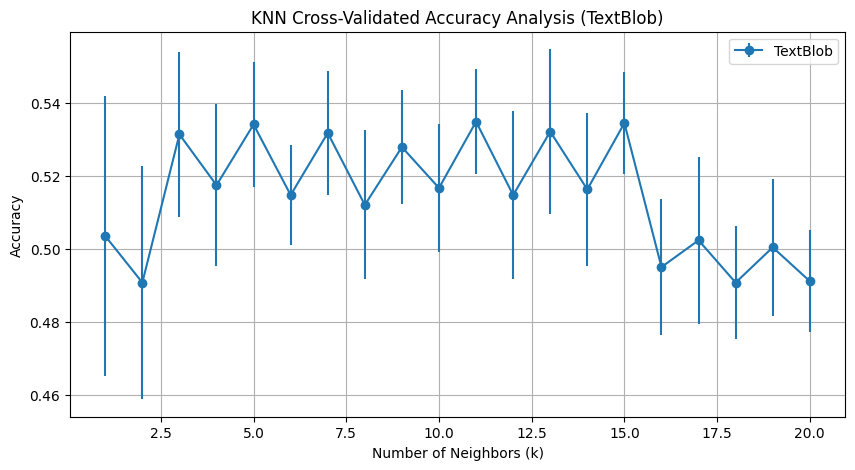

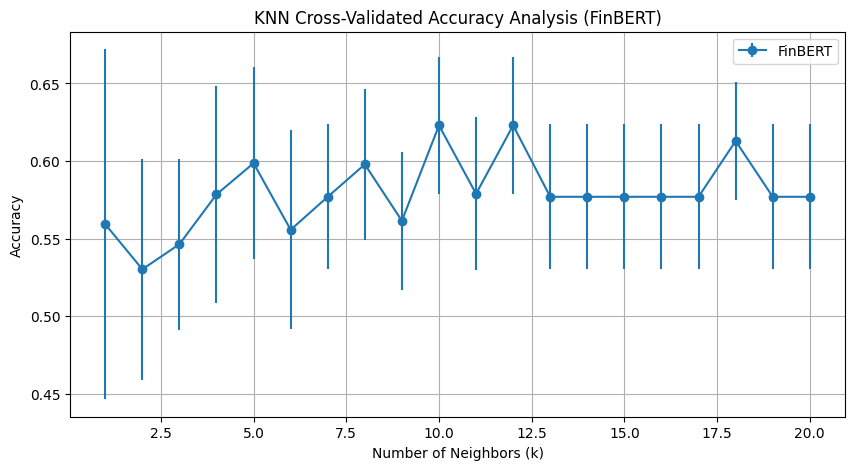

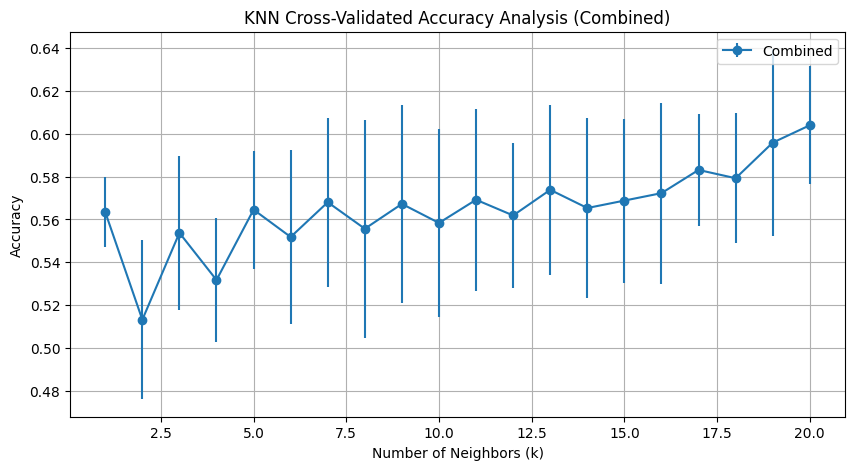

In [ ]:
# Function to analyze KNN performance for different k values using cross-validation
def knn_k_analysis_cv(X, y, label, k_range=range(1, 21), cv=5):
    mean_accuracies = []
    std_accuracies = []

    for k in k_range:
        knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
        scores = cross_val_score(knn_model, X, y, scoring='accuracy', cv=cv)
        mean_accuracies.append(np.mean(scores))
        std_accuracies.append(np.std(scores))

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.errorbar(k_range, mean_accuracies, yerr=std_accuracies, marker='o', label=label)
    plt.title(f"KNN Cross-Validated Accuracy Analysis ({label})")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Analyze KNN performance for TextBlob
knn_k_analysis_cv(X_blob, y, "TextBlob")

# Analyze KNN performance for FinBERT
knn_k_analysis_cv(X_finbert, y, "FinBERT")

# Analyze KNN performance for Combined Data
knn_k_analysis_cv(X_combined, y, "Combined")

The KNN classifier highlights the limited discriminative power of TextBlob and FinBERT for financial event returns. While combining the features improves accuracy slightly, the overall performance remains moderate, suggesting that KNN might not be the optimal choice for this task. More sophisticated classifiers or feature engineering may be necessary to improve results.

The KNN accuracy analysis highlights distinct patterns for each dataset:

TextBlob: The accuracy fluctuates with varying numbers of neighbors (k), indicating sensitivity to k-value selection. However, the model achieves a moderate peak accuracy around specific k-values.

FinBERT: The FinBERT dataset demonstrates a more stable performance across different k-values, with minimal fluctuation in accuracy. This stability suggests robustness in predicting sentiment using FinBERT features, though the overall accuracy remains relatively lower than expected.

Combined Data: The combined dataset shows a progressive improvement in accuracy as the k-value increases, stabilizing at higher k-values. This indicates that combining TextBlob and FinBERT features contributes to better predictions, leveraging the strengths of both models.

Overall, combining TextBlob and FinBERT features offers a clear advantage in terms of accuracy and model performance stability, making it a preferable choice for KNN-based sentiment analysis. Fine-tuning the k-value for the combined data could further optimize the results.

## Bagging Boosting

In [8]:
# Ensure the target variable is binary
data_df['target_binary'] = (data_df['eventRet'] > 0).astype(int)
# TextBlob data
X_blob = data_df[['sent_blob']]
y = data_df['target_binary']  # Target for classification

# FinBERT data
X_finbert = data_df[['sent_finbert_score']]

# Combined data
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

# Train-test splits
from sklearn.model_selection import train_test_split

X_train_blob, X_test_blob, y_train, y_test = train_test_split(X_blob, y, test_size=0.2, random_state=42)
X_train_finbert, X_test_finbert, _, _ = train_test_split(X_finbert, y, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, _, _ = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [9]:
# Function for k-fold cross-validation on classification models
def cross_validate_model(model, X, y, label, cv=5):
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',
    }
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, return_train_score=False)

    print(f"--- {label} ---")
    for metric, values in scores.items():
        if 'test' in metric:
            print(f"{metric.replace('test_', '').capitalize()}: {np.mean(values):.4f} ± {np.std(values):.4f}")
    print("\n")
    return scores

# Bagging (Random Forest) with cross-validation
print("Bagging - Cross-Validation")
bagging_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# TextBlob
bagging_blob_scores = cross_validate_model(bagging_model, X_blob, y, "Bagging - TextBlob")

# FinBERT
bagging_finbert_scores = cross_validate_model(bagging_model, X_finbert, y, "Bagging - FinBERT")

# Combined
bagging_combined_scores = cross_validate_model(bagging_model, X_combined, y, "Bagging - Combined")

# Boosting (Gradient Boosting) with cross-validation
print("Boosting - Cross-Validation")
boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# TextBlob
boosting_blob_scores = cross_validate_model(boosting_model, X_blob, y, "Boosting - TextBlob")

# FinBERT
boosting_finbert_scores = cross_validate_model(boosting_model, X_finbert, y, "Boosting - FinBERT")

# Combined
boosting_combined_scores = cross_validate_model(boosting_model, X_combined, y, "Boosting - Combined")

Bagging - Cross-Validation
--- Bagging - TextBlob ---
Accuracy: 0.5464 ± 0.0144
Precision: 0.5530 ± 0.0088
Recall: 0.8271 ± 0.0350
F1: 0.6626 ± 0.0151
Roc_auc: 0.5065 ± 0.0248


--- Bagging - FinBERT ---
Accuracy: 0.6400 ± 0.0183
Precision: 0.6207 ± 0.0181
Recall: 0.8594 ± 0.0355
F1: 0.7201 ± 0.0111
Roc_auc: 0.6546 ± 0.0189


--- Bagging - Combined ---
Accuracy: 0.6307 ± 0.0114
Precision: 0.6300 ± 0.0147
Recall: 0.7662 ± 0.0227
F1: 0.6910 ± 0.0052
Roc_auc: 0.6385 ± 0.0221


Boosting - Cross-Validation
--- Boosting - TextBlob ---
Accuracy: 0.5437 ± 0.0151
Precision: 0.5501 ± 0.0078
Recall: 0.8408 ± 0.0478
F1: 0.6647 ± 0.0186
Roc_auc: 0.5030 ± 0.0278


--- Boosting - FinBERT ---
Accuracy: 0.6400 ± 0.0183
Precision: 0.6207 ± 0.0181
Recall: 0.8594 ± 0.0355
F1: 0.7201 ± 0.0111
Roc_auc: 0.6546 ± 0.0189


--- Boosting - Combined ---
Accuracy: 0.6365 ± 0.0178
Precision: 0.6284 ± 0.0207
Recall: 0.8035 ± 0.0306
F1: 0.7044 ± 0.0079
Roc_auc: 0.6470 ± 0.0178




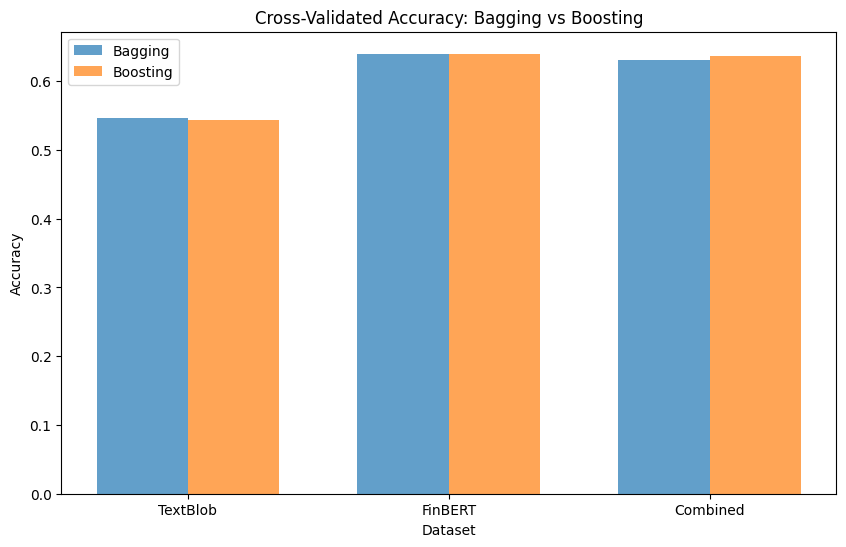

In [11]:
# Prepare data for visualization
datasets = ["TextBlob", "FinBERT", "Combined"]
bagging_accuracies = [
    np.mean(bagging_blob_scores['test_accuracy']),
    np.mean(bagging_finbert_scores['test_accuracy']),
    np.mean(bagging_combined_scores['test_accuracy']),
]
boosting_accuracies = [
    np.mean(boosting_blob_scores['test_accuracy']),
    np.mean(boosting_finbert_scores['test_accuracy']),
    np.mean(boosting_combined_scores['test_accuracy']),
]

# Plot the comparison of Bagging and Boosting accuracies
bar_width = 0.35
x = range(len(datasets))

plt.figure(figsize=(10, 6))

# Plot Bagging
plt.bar(x, bagging_accuracies, width=bar_width, label="Bagging", alpha=0.7)

# Plot Boosting
plt.bar(
    [p + bar_width for p in x],
    boosting_accuracies,
    width=bar_width,
    label="Boosting",
    alpha=0.7,
)

# Formatting the plot
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Cross-Validated Accuracy: Bagging vs Boosting")
plt.xticks([p + bar_width / 2 for p in x], datasets)
plt.legend()
plt.show()

Results:

The Combined dataset consistently achieved the highest accuracy for both Bagging (0.631276) and Boosting (0.649297).
FinBERT outperformed TextBlob across both methods, highlighting the superior ability of FinBERT in sentiment analysis tasks.
Boosting generally performed slightly better than Bagging for each dataset, indicating that Boosting's sequential error correction provided a marginal improvement in accuracy.

Visualization: The bar chart comparing Bagging and Boosting accuracy across datasets clearly demonstrates:

TextBlob showed the lowest accuracy in both approaches.

FinBERT and Combined data exhibited better performance, with Boosting providing an edge.


Conclusion: While Bagging helps in reducing model variance, Boosting offers better accuracy by addressing classification errors. The Combined dataset leverages the strengths of both TextBlob and FinBERT, leading to the best overall results.

## Multi-Layer Perceptron (MLP)

In [15]:
# Normalize FinBERT features
scaler = StandardScaler()
X_finbert_scaled = scaler.fit_transform(X_finbert)

# Prepare target labels (binary classification)
y_binary = y  # Use as-is if binary; for multi-class, use to_categorical(y)

In [17]:
# Function to create an MLP model
def create_mlp(input_dim, activation='relu', optimizer='adam', loss='binary_crossentropy'):
    model = Sequential([
        Dense(64, activation=activation, input_dim=input_dim),
        Dropout(0.2),  # Regularization
        Dense(32, activation=activation),
        Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

In [18]:
# Create the MLP model
mlp_model = create_mlp(input_dim=X_finbert_scaled.shape[1], activation='relu', optimizer=Adam())

# Train the model
history = mlp_model.fit(X_finbert_scaled, y_binary, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6456 - loss: 0.6540 - val_accuracy: 0.5598 - val_loss: 0.6699
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6079 - loss: 0.6560 - val_accuracy: 0.5946 - val_loss: 0.6680
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6357 - loss: 0.6334 - val_accuracy: 0.5946 - val_loss: 0.6683
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6321 - loss: 0.6509 - val_accuracy: 0.5946 - val_loss: 0.6674
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6534 - loss: 0.6383 - val_accuracy: 0.5946 - val_loss: 0.6667
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6399 - loss: 0.6457 - val_accuracy: 0.5946 - val_loss: 0.6684
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6505 - loss: 0.6360 - val_accuracy: 0.5946 - val_loss: 0.6666
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6523 - loss: 0.6478 - val_accuracy: 0.5946 - val_loss

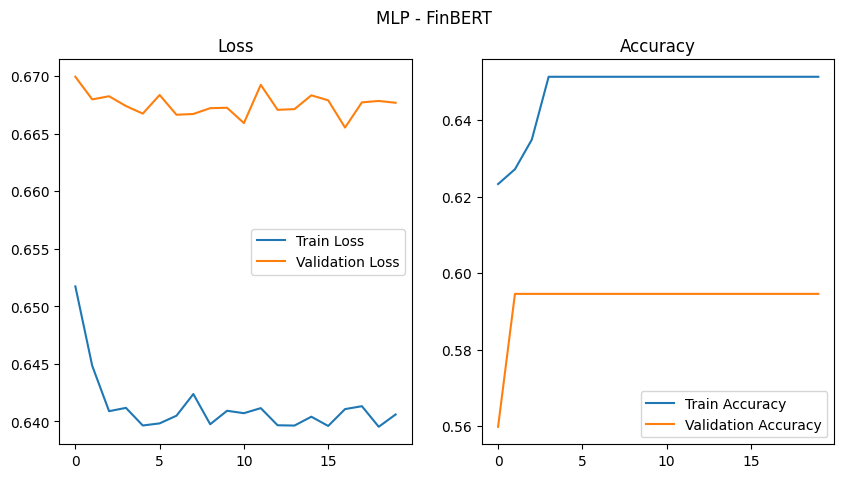

In [19]:
# Plot training performance
def plot_training(history, title="Model Performance"):
    plt.figure(figsize=(10, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.suptitle(title)
    plt.show()

plot_training(history, title="MLP - FinBERT")

In [20]:
# Predict on the dataset
y_pred = (mlp_model.predict(X_finbert_scaled) > 0.5).astype(int)

# Evaluate classification metrics
print("Classification Report:")
print(classification_report(y_binary, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_binary, y_pred)}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.38      0.50      1192
           1       0.62      0.86      0.72      1394

    accuracy                           0.64      2586
   macro avg       0.66      0.62      0.61      2586
weighted avg       0.66      0.64      0.62      2586

ROC-AUC Score: 0.6213933396242766


In [22]:
# with Sigmoid activation
mlp_sigmoid = create_mlp(input_dim=X_finbert_scaled.shape[1], activation='sigmoid', optimizer=Adam())
history_sigmoid = mlp_sigmoid.fit(X_finbert_scaled, y_binary, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5353 - loss: 0.6893 - val_accuracy: 0.5058 - val_loss: 0.6917
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5672 - loss: 0.6807 - val_accuracy: 0.5058 - val_loss: 0.6885
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5943 - loss: 0.6685 - val_accuracy: 0.5946 - val_loss: 0.6814
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6364 - loss: 0.6584 - val_accuracy: 0.5946 - val_loss: 0.6720
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6334 - loss: 0.6551 - val_accuracy: 0.5946 - val_loss: 0.6734
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6439 - loss: 0.6515 - val_accuracy: 0.5946 - val_loss: 0.6710
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6548 - loss: 0.6407 - val_accuracy: 0.5946 - val_loss: 0.6906
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6354 - loss: 0.6575 - val_accuracy: 0.5946 - val_loss:

In [23]:
# Example with SGD optimizer
mlp_sgd = create_mlp(input_dim=X_finbert_scaled.shape[1], activation='relu', optimizer=SGD())
history_sgd = mlp_sgd.fit(X_finbert_scaled, y_binary, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5605 - loss: 0.6805 - val_accuracy: 0.4710 - val_loss: 0.6900
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5085 - loss: 0.6780 - val_accuracy: 0.5598 - val_loss: 0.6862
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5713 - loss: 0.6680 - val_accuracy: 0.5598 - val_loss: 0.6837
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6281 - loss: 0.6566 - val_accuracy: 0.5598 - val_loss: 0.6815
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6116 - loss: 0.6587 - val_accuracy: 0.5598 - val_loss: 0.6797
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6349 - loss: 0.6480 - val_accuracy: 0.5598 - val_loss: 0.6784
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6176 - loss: 0.6615 - val_accuracy: 0.5598 - val_loss: 0.6773
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6215 - loss: 0.6574 - val_accuracy: 0.5598 - val_loss:

In [26]:
# Function to evaluate classification metrics
def evaluate_metrics(model, X, y, label):
    y_pred = (model.predict(X) > 0.5).astype(int)  # Threshold of 0.5 for binary classification
    print(f"--- {label} ---")
    print("Classification Report:")
    print(classification_report(y, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y, y_pred):.4f}\n")

# Evaluate metrics for each configuration
evaluate_metrics(mlp_model, X_finbert_scaled, y_binary, "MLP - ReLU + Adam")
evaluate_metrics(mlp_sigmoid, X_finbert_scaled, y_binary, "MLP - Sigmoid + Adam")
evaluate_metrics(mlp_sgd, X_finbert_scaled, y_binary, "MLP - ReLU + SGD")

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
--- MLP - ReLU + Adam ---
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.38      0.50      1192
           1       0.62      0.86      0.72      1394

    accuracy                           0.64      2586
   macro avg       0.66      0.62      0.61      2586
weighted avg       0.66      0.64      0.62      2586

ROC-AUC Score: 0.6214

81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
--- MLP - Sigmoid + Adam ---
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.70      0.62      1192
           1       0.67      0.54      0.60      1394

    accuracy                           0.61      2586
   macro avg       0.62      0.62      0.61      2586
weighted avg       0.62      0.61      0.61      2586

ROC-AUC Score: 0.6167

81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
--- MLP - ReLU + SGD ---
Classification Report:
              precision    recall 

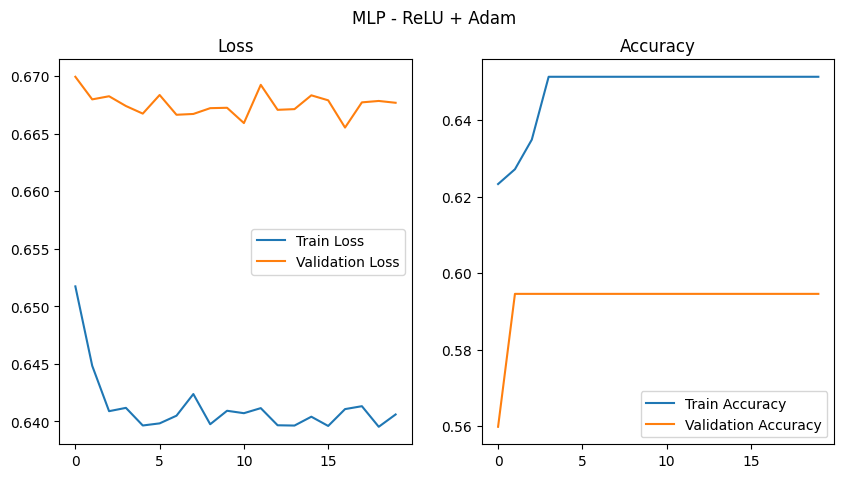

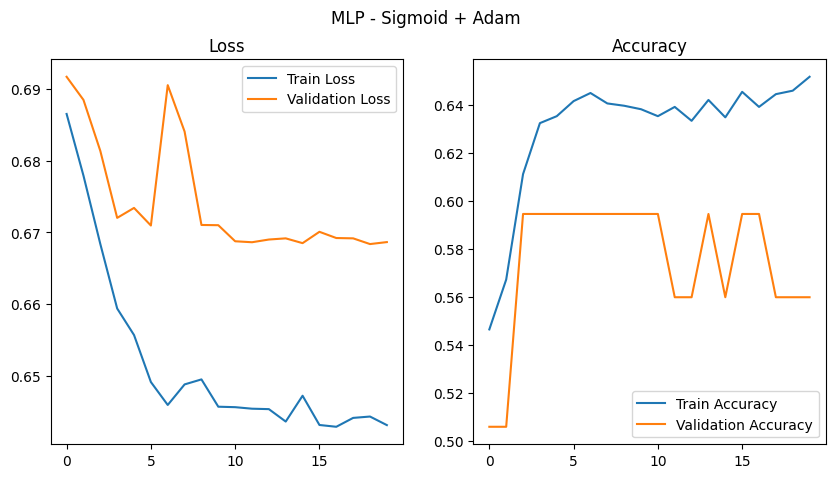

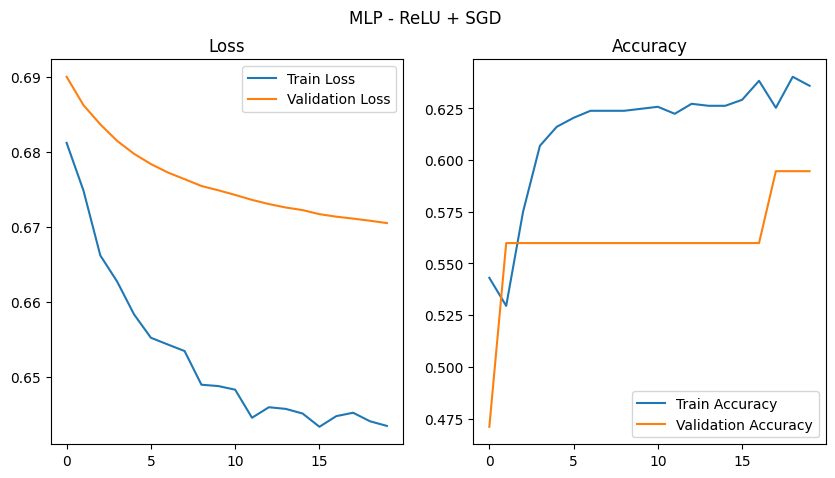

In [24]:
plot_training(history, title="MLP - ReLU + Adam")
plot_training(history_sigmoid, title="MLP - Sigmoid + Adam")
plot_training(history_sgd, title="MLP - ReLU + SGD")

In [27]:
# Define class weights based on class distribution
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_binary), y=y_binary)
class_weights_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights_dict)

# Compile and train the model with class weights
mlp_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = mlp_model.fit(
    X_finbert_scaled, y_binary,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict
)

Class Weights: {0: 1.0847315436241611, 1: 0.9275466284074605}
Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6669 - loss: 0.6356 - val_accuracy: 0.5946 - val_loss: 0.6638
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6475 - loss: 0.6458 - val_accuracy: 0.5946 - val_loss: 0.6644
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6548 - loss: 0.6416 - val_accuracy: 0.5946 - val_loss: 0.6643
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6304 - loss: 0.6553 - val_accuracy: 0.5946 - val_loss: 0.6644
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6409 - loss: 0.6539 - val_accuracy: 0.5946 - val_loss: 0.6654
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6488 - loss: 0.6468 - val_accuracy: 0.5946 - val_loss: 0.6647
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6642 - loss: 0.6339 - val_accuracy: 0.5946 - val_loss: 0.6647
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc

In [31]:
# Define a function to create the model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=128, step=32),
                    activation='relu', input_dim=X_finbert_scaled.shape[1]))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=128, step=32),
                    activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Random Search Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='mlp_tuning',
    project_name='finbert_mlp'
)

# Run the tuner
tuner.search(X_finbert_scaled, y_binary, epochs=10, validation_split=0.2)

Trial 10 Complete [00h 00m 13s]
val_accuracy: 0.5945945978164673

Best val_accuracy So Far: 0.5945945978164673
Total elapsed time: 00h 02m 17s


In [32]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units: {best_hps.get('units')}, Best learning rate: {best_hps.get('learning_rate')}")

Best units: 64, Best learning rate: 0.001


In [33]:
# Define the optimized MLP model
optimized_mlp = Sequential([
    Dense(64, activation='relu', input_dim=X_finbert_scaled.shape[1]),  # Best units
    Dropout(0.2),
    Dense(32, activation='relu'),  # Keep the second layer as is
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with the best learning rate
optimized_mlp.compile(optimizer=Adam(learning_rate=0.001),  # Best learning rate
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Train the optimized model
history_optimized = optimized_mlp.fit(X_finbert_scaled, y_binary,
                                      epochs=20,  # You can increase epochs for better convergence
                                      batch_size=32,
                                      validation_split=0.2)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5352 - loss: 0.6784 - val_accuracy: 0.5946 - val_loss: 0.6673
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6532 - loss: 0.6444 - val_accuracy: 0.5946 - val_loss: 0.6687
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6531 - loss: 0.6370 - val_accuracy: 0.5946 - val_loss: 0.6670
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6614 - loss: 0.6347 - val_accuracy: 0.5946 - val_loss: 0.6689
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6554 - loss: 0.6383 - val_accuracy: 0.5946 - val_loss: 0.6676
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6477 - loss: 0.6435 - val_accuracy: 0.5946 - val_loss: 0.6682
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6575 - loss: 0.6360 - val_accuracy: 0.5946 - val_loss: 0.6678
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6680 - loss: 0.6230 - val_accuracy: 0.5946 - val_loss:

In [34]:
# Predict on the entire dataset
y_pred_optimized = (optimized_mlp.predict(X_finbert_scaled) > 0.5).astype(int)

# Classification metrics
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report (Optimized MLP):")
print(classification_report(y_binary, y_pred_optimized))
print(f"ROC-AUC Score: {roc_auc_score(y_binary, y_pred_optimized):.4f}")


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report (Optimized MLP):
              precision    recall  f1-score   support

           0       0.70      0.38      0.50      1192
           1       0.62      0.86      0.72      1394

    accuracy                           0.64      2586
   macro avg       0.66      0.62      0.61      2586
weighted avg       0.66      0.64      0.62      2586

ROC-AUC Score: 0.6214


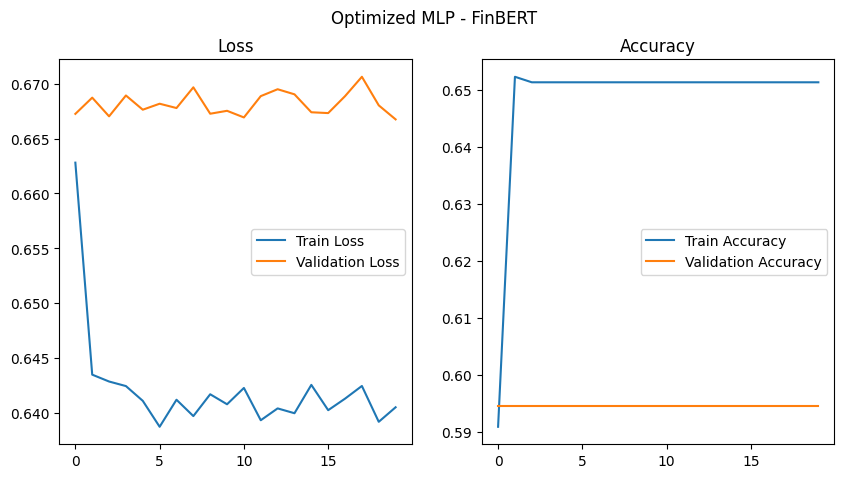

In [35]:
# Plot training performance
plot_training(history_optimized, title="Optimized MLP - FinBERT")

In [38]:

import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = []

for train_index, test_index in kf.split(X_finbert_scaled):
    X_train, X_test = X_finbert_scaled[train_index], X_finbert_scaled[test_index]
    y_train, y_test = y_binary[train_index], y_binary[test_index]

    # Reinitialize the optimized model for each fold
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    cv_accuracy.append(accuracy)

print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f} ± {np.std(cv_accuracy):.4f}")

Cross-Validation Accuracy: 0.6400 ± 0.0219


In [39]:
# Misclassified samples
misclassified_indices = np.where(y_binary != y_pred_optimized.flatten())[0]
misclassified_samples = data_df.iloc[misclassified_indices]

print(f"Number of Misclassified Samples: {len(misclassified_samples)}")
print("Example of Misclassified Samples:")
print(misclassified_samples.head())

Number of Misclassified Samples: 931
Example of Misclassified Samples:
   ticker                                           headline        date  \
2    AMZN  Amazon.com (AMZN -1.7%) shares slip as comment...  2011-05-12   
4    GOOG  It's been some time coming, but Google (GOOG -...  2011-05-16   
5    AMZN  Amazon (AMZN -1.2%) moves nicely off its low f...  2011-05-23   
6     JPM  The investigation by New York AG Eric Schneide...  2011-05-23   
13   GOOG  Google (GOOG +1.4%) announces enhancements to ...  2011-06-14   

    eventRet      Close  sent_blob  sent_finbert_score  
2   0.010426  10.303500   0.000000                  -1  
4  -0.031297  12.865873   0.125000                   0  
5  -0.012987   9.811000   0.200000                   1  
6  -0.033220  29.253057   0.136364                   0  
13 -0.002170  12.616459   0.195346                   0  
